<a href="https://colab.research.google.com/github/varmor/MLH---Local-Hack-Day-Build-2022-/blob/master/LHD_Build_2022_Exploring_And_Cleaning_Our_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/train.csv')

train.head()


,id,zipcode,city,state,dateSold,bathrooms,bedrooms,livingArea,homeType,homeStatus,lotArea,lotUnit,address,price
0,20479,76247.0,Justin,TX,1.641456e+12,3.0,4.0,3078.0,SINGLE_FAMILY,RECENTLY_SOLD,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0
1,13019,6070.0,Simsbury,CT,1.641283e+12,3.0,3.0,2200.0,CONDO,PENDING,0.00,sqft,"18 Brettonwood Dr, Simsbury, CT 06070",399900.0
2,9816,85340.0,Litchfield Park,AZ,1.641370e+12,5.0,5.0,3722.0,SINGLE_FAMILY,RECENTLY_SOLD,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0
3,4479,99507.0,Anchorage,AK,1.641370e+12,2.0,3.0,1388.0,CONDO,RECENTLY_SOLD,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0
4,180,3901.0,Berwick,ME,1.640905e+12,4.0,3.0,2972.0,SINGLE_FAMILY,RECENTLY_SOLD,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0


In [3]:
len(train)

23634

In [4]:
for column in train.columns:
  print(column)
  print(train[column].value_counts().nlargest(5))
  print('  ')

id
2047     1
12995    1
693      1
6838     1
4791     1
Name: id, dtype: int64
  
zipcode
82001.0    103
82009.0     68
99504.0     62
99577.0     60
83709.0     56
Name: zipcode, dtype: int64
  
city
Anchorage       318
Louisville      224
Cheyenne        205
Las Vegas       199
Indianapolis    198
Name: city, dtype: int64
  
state
CT    938
IN    885
GA    862
DE    845
IA    832
Name: state, dtype: int64
  
dateSold
1.640851e+12    4724
1.641542e+12    3566
1.641456e+12    2444
1.641370e+12    1870
1.640765e+12    1735
Name: dateSold, dtype: int64
  
bathrooms
2.0    10563
3.0     6628
1.0     4018
4.0     1643
5.0      294
Name: bathrooms, dtype: int64
  
bedrooms
3.0    11286
4.0     5751
2.0     4161
5.0     1309
1.0      630
Name: bedrooms, dtype: int64
  
livingArea
1200.000000    150
1954.681419    117
1800.000000    107
960.000000      96
1400.000000     95
Name: livingArea, dtype: int64
  
homeType
SINGLE_FAMILY    19067
CONDO             2117
TOWNHOUSE         1922
MULTI_

In [5]:
train_only_sold = train[train['homeStatus'] == 'RECENTLY_SOLD'].copy()
train_only_sold.head()

,id,zipcode,city,state,dateSold,bathrooms,bedrooms,livingArea,homeType,homeStatus,lotArea,lotUnit,address,price
0,20479,76247.0,Justin,TX,1.641456e+12,3.0,4.0,3078.0,SINGLE_FAMILY,RECENTLY_SOLD,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0
2,9816,85340.0,Litchfield Park,AZ,1.641370e+12,5.0,5.0,3722.0,SINGLE_FAMILY,RECENTLY_SOLD,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0
3,4479,99507.0,Anchorage,AK,1.641370e+12,2.0,3.0,1388.0,CONDO,RECENTLY_SOLD,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0
4,180,3901.0,Berwick,ME,1.640905e+12,4.0,3.0,2972.0,SINGLE_FAMILY,RECENTLY_SOLD,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0
5,21279,80241.0,Thornton,CO,1.640851e+12,3.0,2.0,1926.0,TOWNHOUSE,RECENTLY_SOLD,0.00,sqft,"1284 E 130th Ave UNIT A, Thornton, CO 80241",435000.0


In [6]:
train_only_sold.drop(['homeStatus', 'address', 'dateSold'], inplace=True, axis = 1 )
train_only_sold.head()

,id,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
0,20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
2,9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
3,4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
4,180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,551900.0
5,21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


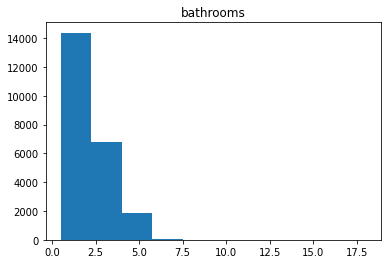

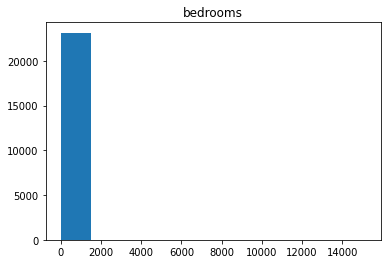

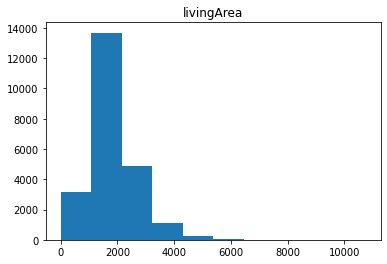

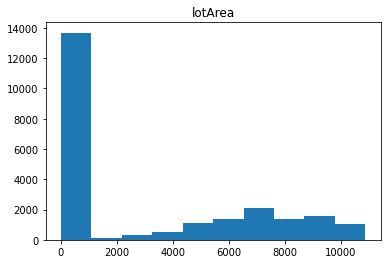

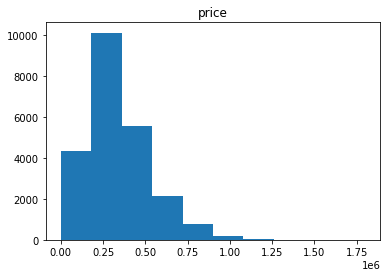

In [7]:
numerical_column = ['bathrooms', 'bedrooms', 'livingArea', 'lotArea','price']

for column in numerical_column:
  plt.title(column)
  plt.hist(train_only_sold[column])
  plt.show()


In [8]:
train_only_sold.head()

,id,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
0,20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
2,9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
3,4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
4,180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,551900.0
5,21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


In [9]:
square_feet_in_acre = 43560

def conver_lot_area(row):
  if row['lotUnit']== 'acres':
    return row['lotArea'] * square_feet_in_acre
  else:
    return row['lotArea']

train_only_sold['lotArea']= train_only_sold.apply(conver_lot_area, axis=1)
train_only_sold.head()


,id,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
0,20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
2,9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
3,4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
4,180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,79714.80,acres,551900.0
5,21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


In [10]:
train_only_sold.drop('lotUnit', axis=1, inplace=True)

In [11]:
train_only_sold.head()

,id,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,price
0,20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,358100.0
2,9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,660000.0
3,4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,232500.0
4,180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,79714.80,551900.0
5,21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,435000.0


In [12]:
bedroom_mean = train_only_sold['bedrooms'].mean()

In [13]:
bedroom_std_x_3 = train_only_sold['bedrooms'].std() * 3

In [14]:
bedroom_std_x_3

298.7398864510935

In [15]:
train_only_sold['bedrooms']

0        4.0
2        5.0
3        3.0
4        3.0
5        2.0
        ... 
23628    3.0
23629    3.0
23631    3.0
23632    2.0
23633    2.0
Name: bedrooms, Length: 23148, dtype: float64

In [16]:
distance_from_mean = np.abs(train_only_sold['bedrooms']- bedroom_mean)
distance_from_mean

0        0.167467
2        1.167467
3        0.832533
4        0.832533
5        1.832533
           ...   
23628    0.832533
23629    0.832533
23631    0.832533
23632    1.832533
23633    1.832533
Name: bedrooms, Length: 23148, dtype: float64

In [17]:
train_no_outliers =  train_only_sold[distance_from_mean< bedroom_std_x_3].copy()

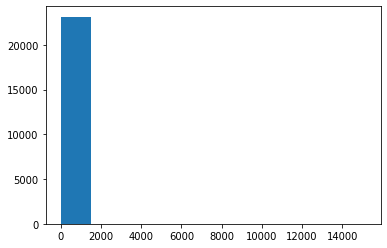

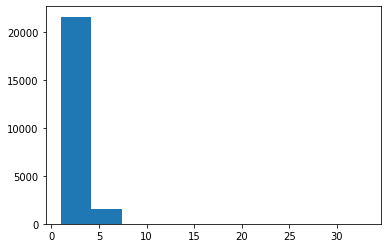

In [18]:
plt.hist(train_only_sold['bedrooms'])
plt.show()
plt.hist(train_no_outliers['bedrooms'])
plt.show()

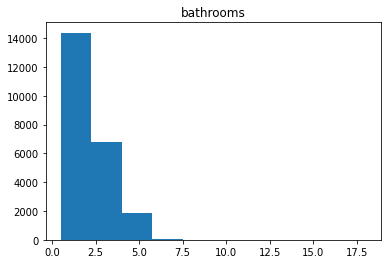

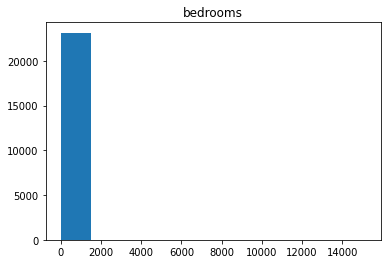

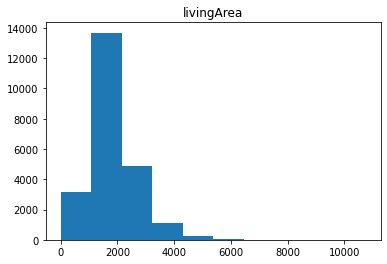

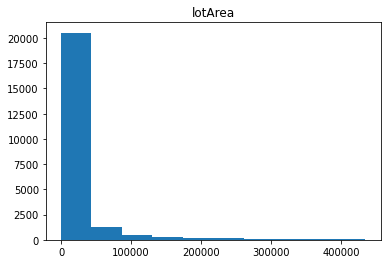

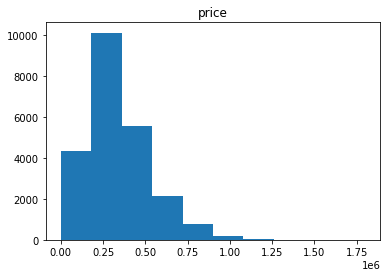

In [19]:
numerical_column = ['bathrooms', 'bedrooms', 'livingArea', 'lotArea','price']

for column in numerical_column:
  plt.title(column)
  plt.hist(train_only_sold[column])
  plt.show()

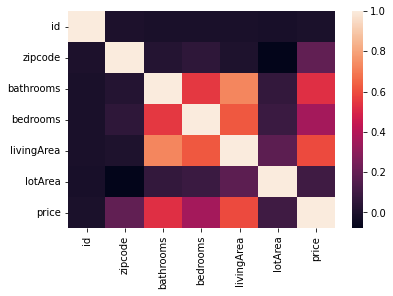

In [22]:
sns.heatmap(train_no_outliers.corr())

In [23]:
train_no_outliers.head()

,id,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,price
0,20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,358100.0
2,9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,660000.0
3,4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,232500.0
4,180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,79714.80,551900.0
5,21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,435000.0


In [29]:
# Lets one-hot encode homeType!

train_one_hot = pd.get_dummies(train_no_outliers, columns=['homeType'])

train_one_hot

,id,zipcode,city,state,bathrooms,bedrooms,livingArea,lotArea,price,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
0,20479,76247.0,Justin,TX,3.0,4.0,3078.0,7492.32,358100.0,0,0,1,0
2,9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,6577.56,660000.0,0,0,1,0
3,4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,0.00,232500.0,1,0,0,0
4,180,3901.0,Berwick,ME,4.0,3.0,2972.0,79714.80,551900.0,0,0,1,0
5,21279,80241.0,Thornton,CO,3.0,2.0,1926.0,0.00,435000.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23628,11964,31204.0,Macon,GA,2.0,3.0,2428.0,7840.80,175000.0,0,0,1,0
23629,21575,2907.0,Providence,RI,2.0,3.0,1600.0,3600.00,305000.0,0,0,1,0
23631,860,85302.0,Glendale,AZ,2.0,3.0,1605.0,6150.00,305000.0,0,0,1,0
23632,15795,85138.0,Maricopa,AZ,2.0,2.0,1810.0,8713.00,360000.0,0,0,1,0


In [27]:
len(train_no_outliers['zipcode'].unique())

7301

In [31]:
zip_code_df = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/median_income_by_zip_code.csv')

zip_code_df['median_income']

0         9419
1         9963
2        10520
3        10272
4        12352
         ...  
33115    36175
33116    22303
33117    30446
33118    36175
33119    28918
Name: median_income, Length: 33120, dtype: int64

In [32]:
train_with_median_income = pd.merge(train_one_hot, zip_code_df, how='left', left_on='zipcode', right_on='zip_code')

train_with_median_income['median_income'].fillna(train_with_median_income['median_income'].mean(), inplace=True)

train_with_median_income.drop(['zipcode', 'zip_code'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1117: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [33]:
train_with_median_income

,id,city,state,bathrooms,bedrooms,livingArea,lotArea,price,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,median_income
0,20479,Justin,TX,3.0,4.0,3078.0,7492.32,358100.0,0,0,1,0,46658.0
1,9816,Litchfield Park,AZ,5.0,5.0,3722.0,6577.56,660000.0,0,0,1,0,57188.0
2,4479,Anchorage,AK,2.0,3.0,1388.0,0.00,232500.0,1,0,0,0,66044.0
3,180,Berwick,ME,4.0,3.0,2972.0,79714.80,551900.0,0,0,1,0,46016.0
4,21279,Thornton,CO,3.0,2.0,1926.0,0.00,435000.0,0,0,0,1,65217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23142,11964,Macon,GA,2.0,3.0,2428.0,7840.80,175000.0,0,0,1,0,21375.0
23143,21575,Providence,RI,2.0,3.0,1600.0,3600.00,305000.0,0,0,1,0,33125.0
23144,860,Glendale,AZ,2.0,3.0,1605.0,6150.00,305000.0,0,0,1,0,30005.0
23145,15795,Maricopa,AZ,2.0,2.0,1810.0,8713.00,360000.0,0,0,1,0,50044.0
